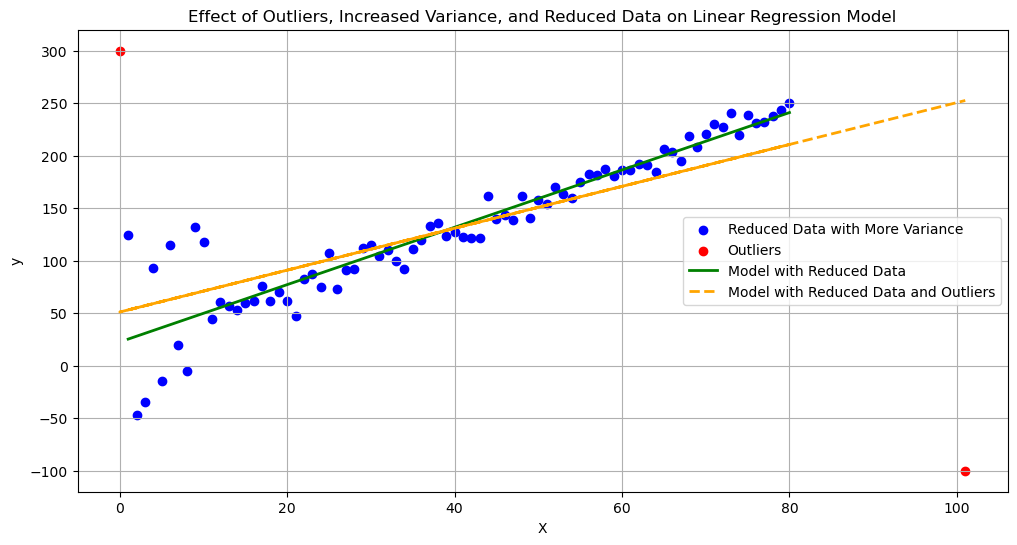

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some linear data
np.random.seed(0)
X = np.arange(1, 101).reshape(-1, 1)
y = 3 * X.squeeze() + 10 + np.random.normal(0, 10, X.shape[0])

# Adjusting the data to increase variance on the edges
y_with_more_variance = y.copy()
y_with_more_variance[:10] += np.random.normal(0, 50, 10)
y_with_more_variance[-10:] += np.random.normal(0, 50, 10)

# Create outliers
X_outliers = np.array([[0], [101]])
y_outliers = np.array([300, -100])

# Reducing the number of data points by 20%
reduction_factor = 0.8
num_points = int(len(X) * reduction_factor)

# Select a subset of the data
X_reduced = X[:num_points]
y_reduced = y_with_more_variance[:num_points]

# Combine reduced data with outliers
X_reduced_with_outliers = np.vstack([X_reduced, X_outliers])
y_reduced_with_outliers = np.concatenate([y_reduced, y_outliers])

# Fit linear models
model_reduced = LinearRegression().fit(X_reduced, y_reduced)
model_reduced_with_outliers = LinearRegression().fit(X_reduced_with_outliers, y_reduced_with_outliers)

# Predictions
y_pred_reduced = model_reduced.predict(X_reduced)
y_pred_reduced_with_outliers = model_reduced_with_outliers.predict(X_reduced_with_outliers)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X_reduced, y_reduced, label='Reduced Data with More Variance', color='blue')
plt.scatter(X_outliers, y_outliers, label='Outliers', color='red')
plt.plot(X_reduced, y_pred_reduced, label='Model with Reduced Data', color='green', linewidth=2)
plt.plot(X_reduced_with_outliers, y_pred_reduced_with_outliers, label='Model with Reduced Data and Outliers', color='orange', linewidth=2, linestyle='dashed')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Effect of Outliers, Increased Variance, and Reduced Data on Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

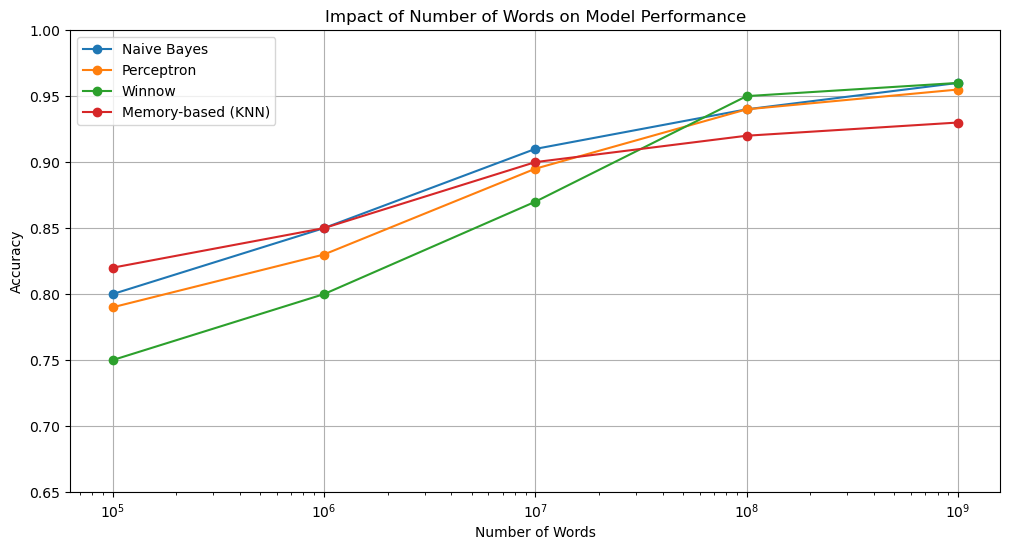

In [1]:
import matplotlib.pyplot as plt

# Given data points
word_counts = [100000, 1000000, 10000000, 100000000, 1000000000]
memory_based_accuracies = [0.82, 0.85, 0.90, 0.92, 0.93]
naive_bayes_accuracies = [0.80, 0.85, 0.91, 0.94, 0.96]
winnow_accuracies = [0.75, 0.80, 0.87, 0.95, 0.96]
perceptron_accuracies = [0.79, 0.83, 0.895, 0.94, 0.955]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(word_counts, naive_bayes_accuracies, label='Naive Bayes', marker='o')
plt.plot(word_counts, perceptron_accuracies, label='Perceptron', marker='o')
plt.plot(word_counts, winnow_accuracies, label='Winnow', marker='o')
plt.plot(word_counts, memory_based_accuracies, label='Memory-based (KNN)', marker='o')

plt.xscale('log')
plt.xlabel('Number of Words')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Words on Model Performance')
plt.legend()
plt.ylim(.65, 1)
plt.grid(True)
plt.show()